In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = 'Microsoft Yahei'

# 客户表

In [112]:
cus = pd.read_csv("../data/customers.csv", low_memory=False)
cus.head()
cus.drop("连锁标记", axis=1, inplace=True)
cus.drop("连锁标记(更新)", axis=1, inplace=True)
cus.drop("客户类型", axis=1, inplace=True)

缺失数据填充方案（已弃用）
```python
for index, row in tqdm(cus.loc[cus['客户等级'].isna()].iterrows(), total=cus.loc[cus['客户等级'].isna()].shape[0]):
    fill_level = None
    if cus.loc[cus['客户所在县'] == row['客户所在县'], '客户等级'].notna().any():
        fill_level = cus.loc[cus['客户所在县'] == row['客户所在县'], '客户等级'].value_counts().index[0]
    elif cus.loc[cus['客户所在市'] == row['客户所在市'], '客户等级'].notna().any():
        fill_level = cus.loc[cus['客户所在市'] == row['客户所在市'], '客户等级'].value_counts().index[0]
    elif cus.loc[cus['客户所在省'] == row['客户所在省'], '客户等级'].notna().any():
        fill_level = cus.loc[cus['客户所在省'] == row['客户所在省'], '客户等级'].value_counts().index[0]
    if fill_level == None:
        fill_level = cus['客户等级'].value_counts()[0]
    row['客户等级'] = fill_level
```

In [113]:
cus.head()

,id,客户id,客户名称,客户类型(更新),推广经理,当前状态,客户所在省,客户所在市,客户所在县,位置(新增),是否医保店,客户等级,客户店员数,经营品种数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本
0,22381f4a-027f-4c3e-a588-a08a266e9c0f,7081090359123820544,桥西****结合诊所,诊所,平志红,启用,河北省,石家庄市,桥西区,市,是,60万-70万,2.0,806.0,诊所,诊所,2023-07-02 10:05:01.913,否,不连锁,1
1,32721fcf-71b3-416b-91fd-57a1d9fba430,6970904116784796290,武胜****生服务站,卫生服务站,杨茜,启用,四川省,广安市,武胜县,县,是,50万-60万,3.0,180.0,院边店,院边店,2021-03-03 14:11:28.36,是,不连锁,1
2,a3cd0d22-a66f-4791-9ef3-950347f4dff3,6970904167602983220,岳池****生服务站,卫生服务站,刘璐,启用,四川省,广安市,岳池县,县,是,50万-60万,5.0,750.0,院边店,院边店,2021-05-12 16:40:57.85,否,不连锁,1
3,ffe7cf09-172e-453a-89b0-b87ccdc14ec0,6970904089375019075,老僧****生服务站,卫生服务站,郝苗苗,启用,山东省,济宁市,嘉祥县,村,否,10万以下,4.0,30.0,院边店,院边店,2020-10-23 15:42:34.097,是,不连锁,1
4,b3f741d1-9e91-47a7-8597-a0fd3f5e5561,6970904090218075018,叙永****生服务站,卫生服务站,游凯,启用,四川省,泸州市,叙永县,县,是,10万以下,2.0,0.0,院边店,院边店,2021-01-11 18:30:33.077,是,不连锁,1


## 删除有缺失数据样本

In [114]:
cus.dropna(axis=0, inplace=True)

<Axes: >

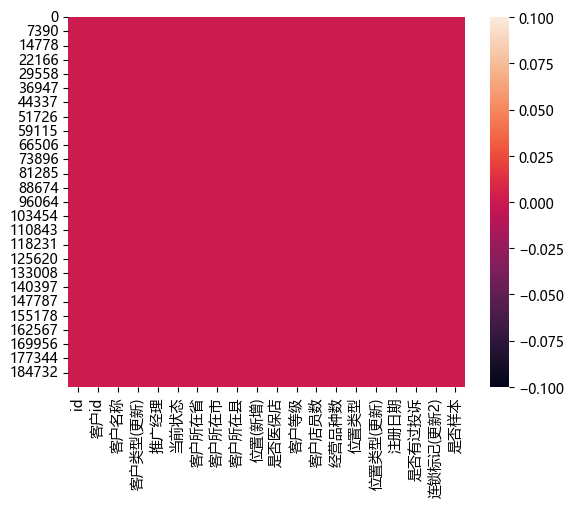

In [43]:
sns.heatmap(cus.isna())

## 是否医保

是1，否0

In [115]:
cus["是否医保店"].value_counts()

是否医保店
是    98692
否    93372
Name: count, dtype: int64

In [116]:
cus["是否医保店"] = cus["是否医保店"].replace({"是": 1, "否": 0})

## 客户等级

改成顺序变量

In [117]:
cus["客户等级"].value_counts()

客户等级
10万-20万     50177
10万以下       40152
20万-30万     36548
30万-40万     24897
40万-50万     14401
50万-60万      8998
60万-70万      5446
70万-80万      4029
100万以上       3319
80万-90万      2474
90万-100万     1617
0               5
1000            1
Name: count, dtype: int64

In [118]:
cus.drop(cus[cus["客户等级"] == "0"].index, inplace=True)
cus.drop(cus[cus["客户等级"] == "1000"].index, inplace=True)

In [119]:
cus["客户等级"].replace(
    {
        "10万以下": 1,
        "10万-20万": 2,
        "20万-30万": 3,
        "30万-40万": 4,
        "40万-50万": 5,
        "50万-60万": 6,
        "60万-70万": 7,
        "70万-80万": 8,
        "80万-90万": 9,
        "90万-100万": 10,
        "100万以上": 11,
    },
    inplace=True,
)

In [120]:
cus.head()

,id,客户id,客户名称,客户类型(更新),推广经理,当前状态,客户所在省,客户所在市,客户所在县,位置(新增),是否医保店,客户等级,客户店员数,经营品种数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本
0,22381f4a-027f-4c3e-a588-a08a266e9c0f,7081090359123820544,桥西****结合诊所,诊所,平志红,启用,河北省,石家庄市,桥西区,市,1,7,2.0,806.0,诊所,诊所,2023-07-02 10:05:01.913,否,不连锁,1
1,32721fcf-71b3-416b-91fd-57a1d9fba430,6970904116784796290,武胜****生服务站,卫生服务站,杨茜,启用,四川省,广安市,武胜县,县,1,6,3.0,180.0,院边店,院边店,2021-03-03 14:11:28.36,是,不连锁,1
2,a3cd0d22-a66f-4791-9ef3-950347f4dff3,6970904167602983220,岳池****生服务站,卫生服务站,刘璐,启用,四川省,广安市,岳池县,县,1,6,5.0,750.0,院边店,院边店,2021-05-12 16:40:57.85,否,不连锁,1
3,ffe7cf09-172e-453a-89b0-b87ccdc14ec0,6970904089375019075,老僧****生服务站,卫生服务站,郝苗苗,启用,山东省,济宁市,嘉祥县,村,0,1,4.0,30.0,院边店,院边店,2020-10-23 15:42:34.097,是,不连锁,1
4,b3f741d1-9e91-47a7-8597-a0fd3f5e5561,6970904090218075018,叙永****生服务站,卫生服务站,游凯,启用,四川省,泸州市,叙永县,县,1,1,2.0,0.0,院边店,院边店,2021-01-11 18:30:33.077,是,不连锁,1


## 位置(新增)

顺序变量，由小到大给数字

In [121]:
cus['位置(新增)'].value_counts()

位置(新增)
市    79136
村    59874
县    53048
Name: count, dtype: int64

In [122]:
cus["位置(新增)"].replace(
    {
        "村": 1,
        "县": 2,
        "市": 3,
    },
    inplace=True,
)

## 客户店员数

部分数值过于极端，改成上限为均值+0.05倍标准差

In [123]:
cus['客户店员数'].std()

602.5484754752191

<Axes: >

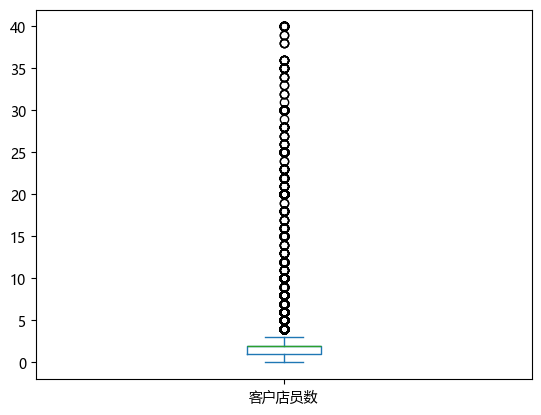

In [124]:
cus.loc[cus['客户店员数']<cus['客户店员数'].mean()+0.05*cus['客户店员数'].std(), '客户店员数'].plot(kind='box')

In [125]:
cus.loc[cus['客户店员数']>cus['客户店员数'].mean()+0.05*cus['客户店员数'].std(), '客户店员数'] = 40

<Axes: >

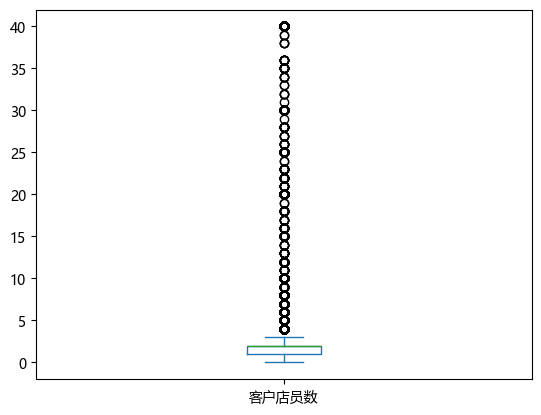

In [126]:
cus['客户店员数'].plot(kind='box')

In [127]:
cus.head()

,id,客户id,客户名称,客户类型(更新),推广经理,当前状态,客户所在省,客户所在市,客户所在县,位置(新增),是否医保店,客户等级,客户店员数,经营品种数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本
0,22381f4a-027f-4c3e-a588-a08a266e9c0f,7081090359123820544,桥西****结合诊所,诊所,平志红,启用,河北省,石家庄市,桥西区,3,1,7,2.0,806.0,诊所,诊所,2023-07-02 10:05:01.913,否,不连锁,1
1,32721fcf-71b3-416b-91fd-57a1d9fba430,6970904116784796290,武胜****生服务站,卫生服务站,杨茜,启用,四川省,广安市,武胜县,2,1,6,3.0,180.0,院边店,院边店,2021-03-03 14:11:28.36,是,不连锁,1
2,a3cd0d22-a66f-4791-9ef3-950347f4dff3,6970904167602983220,岳池****生服务站,卫生服务站,刘璐,启用,四川省,广安市,岳池县,2,1,6,5.0,750.0,院边店,院边店,2021-05-12 16:40:57.85,否,不连锁,1
3,ffe7cf09-172e-453a-89b0-b87ccdc14ec0,6970904089375019075,老僧****生服务站,卫生服务站,郝苗苗,启用,山东省,济宁市,嘉祥县,1,0,1,4.0,30.0,院边店,院边店,2020-10-23 15:42:34.097,是,不连锁,1
4,b3f741d1-9e91-47a7-8597-a0fd3f5e5561,6970904090218075018,叙永****生服务站,卫生服务站,游凯,启用,四川省,泸州市,叙永县,2,1,1,2.0,0.0,院边店,院边店,2021-01-11 18:30:33.077,是,不连锁,1


## 经营品种数

非常不可靠，删除

In [128]:
cus['经营品种数'].value_counts().sort_index()

经营品种数
-2000.0          1
 0.0          2668
 1.0           240
 2.0           224
 3.0           118
              ... 
 80000.0         1
 153045.0        2
 300000.0        1
 2294545.0       1
 8001600.0       1
Name: count, Length: 1934, dtype: int64

In [129]:
cus.drop('经营品种数', axis=1, inplace=True)

In [130]:
cus.head()

,id,客户id,客户名称,客户类型(更新),推广经理,当前状态,客户所在省,客户所在市,客户所在县,位置(新增),是否医保店,客户等级,客户店员数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本
0,22381f4a-027f-4c3e-a588-a08a266e9c0f,7081090359123820544,桥西****结合诊所,诊所,平志红,启用,河北省,石家庄市,桥西区,3,1,7,2.0,诊所,诊所,2023-07-02 10:05:01.913,否,不连锁,1
1,32721fcf-71b3-416b-91fd-57a1d9fba430,6970904116784796290,武胜****生服务站,卫生服务站,杨茜,启用,四川省,广安市,武胜县,2,1,6,3.0,院边店,院边店,2021-03-03 14:11:28.36,是,不连锁,1
2,a3cd0d22-a66f-4791-9ef3-950347f4dff3,6970904167602983220,岳池****生服务站,卫生服务站,刘璐,启用,四川省,广安市,岳池县,2,1,6,5.0,院边店,院边店,2021-05-12 16:40:57.85,否,不连锁,1
3,ffe7cf09-172e-453a-89b0-b87ccdc14ec0,6970904089375019075,老僧****生服务站,卫生服务站,郝苗苗,启用,山东省,济宁市,嘉祥县,1,0,1,4.0,院边店,院边店,2020-10-23 15:42:34.097,是,不连锁,1
4,b3f741d1-9e91-47a7-8597-a0fd3f5e5561,6970904090218075018,叙永****生服务站,卫生服务站,游凯,启用,四川省,泸州市,叙永县,2,1,1,2.0,院边店,院边店,2021-01-11 18:30:33.077,是,不连锁,1


## 是否有投诉

改成 是：1，否：0

In [131]:
cus['是否有过投诉'].value_counts()

是否有过投诉
否    115482
是     76576
Name: count, dtype: int64

In [132]:
cus['是否有过投诉'].replace({'是': 1, '否': 0}, inplace=True)

## 连锁标记(更新2)

连锁1，不连锁0

In [133]:
cus['连锁标记(更新2)'].value_counts()

连锁标记(更新2)
不连锁    189004
连锁       3054
Name: count, dtype: int64

In [134]:
cus['连锁标记(更新2)'].replace({'连锁': 1, '不连锁': 0}, inplace=True)

## 客户类型(更新)

`卫生室` 和 `其他` 太少了，删去

In [135]:
cus['客户类型(更新)'].value_counts()

客户类型(更新)
单体药店     110014
卫生服务站     59633
诊所        18564
连锁药店       2649
医院         1168
卫生室          26
其他            4
Name: count, dtype: int64

In [136]:
cus.drop(cus[(cus['客户类型(更新)'] == '卫生室') | (cus['客户类型(更新)'] == '其他')].index, inplace=True)

In [137]:
cus['客户类型(更新)'].value_counts()

客户类型(更新)
单体药店     110014
卫生服务站     59633
诊所        18564
连锁药店       2649
医院         1168
Name: count, dtype: int64

In [138]:
cus_encoded = pd.get_dummies(cus['客户类型(更新)'], prefix='客户类型')

# 将独热编码结果与原始 DataFrame 合并
cus = pd.concat([cus, cus_encoded], axis=1)

# 删除原始的客户类型字段
cus.drop(columns=['客户类型(更新)'], inplace=True)

In [139]:
cus.head().iloc[:, 5:]

,客户所在省,客户所在市,客户所在县,位置(新增),是否医保店,客户等级,客户店员数,位置类型,位置类型(更新),注册日期,是否有过投诉,连锁标记(更新2),是否样本,客户类型_医院,客户类型_单体药店,客户类型_卫生服务站,客户类型_诊所,客户类型_连锁药店
0,河北省,石家庄市,桥西区,3,1,7,2.0,诊所,诊所,2023-07-02 10:05:01.913,0,0,1,False,False,False,True,False
1,四川省,广安市,武胜县,2,1,6,3.0,院边店,院边店,2021-03-03 14:11:28.36,1,0,1,False,False,True,False,False
2,四川省,广安市,岳池县,2,1,6,5.0,院边店,院边店,2021-05-12 16:40:57.85,0,0,1,False,False,True,False,False
3,山东省,济宁市,嘉祥县,1,0,1,4.0,院边店,院边店,2020-10-23 15:42:34.097,1,0,1,False,False,True,False,False
4,四川省,泸州市,叙永县,2,1,1,2.0,院边店,院边店,2021-01-11 18:30:33.077,1,0,1,False,False,True,False,False


In [140]:
cus['是否样本'].value_counts()

是否样本
1    189733
0      2295
Name: count, dtype: int64

## 注册日期

2023.12.31日减去注册日期，改成注册时长变量

In [141]:
cus['注册日期'] = pd.to_datetime(cus['注册日期'])
cus['注册日期']

0        2023-07-02 10:05:01.913
1        2021-03-03 14:11:28.360
2        2021-05-12 16:40:57.850
3        2020-10-23 15:42:34.097
4        2021-01-11 18:30:33.077
                   ...          
192094   2022-06-04 11:30:36.970
192095   2020-11-15 15:57:09.210
192096   2023-11-15 16:36:33.213
192097   2022-11-03 10:45:53.710
192098   2023-01-02 08:12:03.287
Name: 注册日期, Length: 192028, dtype: datetime64[ns]

In [142]:
cus['注册时长'] = (pd.to_datetime('2023-12-31') - cus['注册日期']).dt.days

## 最终字段筛选

保留
```python
['客户id', '位置(新增)', '是否医保店', '客户等级', '客户店员数',
       '是否有过投诉', '连锁标记(更新2)', '注册时长', '客户类型_医院', '客户类型_单体药店',
       '客户类型_卫生服务站', '客户类型_诊所', '客户类型_连锁药店']
```

In [143]:
cus.columns

Index(['id', '客户id', '客户名称', '推广经理', '当前状态', '客户所在省', '客户所在市', '客户所在县',
       '位置(新增)', '是否医保店', '客户等级', '客户店员数', '位置类型', '位置类型(更新)', '注册日期',
       '是否有过投诉', '连锁标记(更新2)', '是否样本', '客户类型_医院', '客户类型_单体药店', '客户类型_卫生服务站',
       '客户类型_诊所', '客户类型_连锁药店', '注册时长'],
      dtype='object')

In [145]:
# 求差集，即被删除的字段
set(cus.columns.to_list()) - set(['客户id', '位置(新增)', '是否医保店', '客户等级', '客户店员数',
       '是否有过投诉', '连锁标记(更新2)', '注册时长', '客户类型_医院', '客户类型_单体药店',
       '客户类型_卫生服务站', '客户类型_诊所', '客户类型_连锁药店'])

{'id',
 '位置类型',
 '位置类型(更新)',
 '客户名称',
 '客户所在县',
 '客户所在市',
 '客户所在省',
 '当前状态',
 '推广经理',
 '是否样本',
 '注册日期'}

In [107]:
cus_final = cus[['客户id', '位置(新增)', '是否医保店', '客户等级', '客户店员数',
       '是否有过投诉', '连锁标记(更新2)', '注册时长', '客户类型_医院', '客户类型_单体药店',
       '客户类型_卫生服务站', '客户类型_诊所', '客户类型_连锁药店']]

In [108]:
cus_final.to_csv('../data/customers_m1.csv', index=False, encoding='utf-8-sig')

In [36]:
cus_final = pd.read_csv('../data/customers_m1.csv')

In [146]:
cus_final.head()

,客户id,位置(新增),是否医保店,客户等级,客户店员数,是否有过投诉,连锁标记(更新2),注册时长,客户类型_医院,客户类型_单体药店,客户类型_卫生服务站,客户类型_诊所,客户类型_连锁药店
0,7081090359123820544,3,1,7,2.0,0,2,181,False,False,False,True,False
1,6970904116784796290,2,1,6,3.0,1,2,1032,False,False,True,False,False
2,6970904167602983220,2,1,6,5.0,0,2,962,False,False,True,False,False
3,6970904089375019075,1,0,1,4.0,1,2,1163,False,False,True,False,False
4,6970904090218075018,2,1,1,2.0,1,2,1083,False,False,True,False,False


# 商品表

In [147]:
com = pd.read_csv('../data/commodity.csv')

In [148]:
com.head()

,id,商品编码,商品名称,品牌名称,规格,单位,生产厂家,批准文号,库存数量,疾病分类统一,商品类别,医保类型,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,上架日期,最后一次采购日期
0,52a54f93-13c9-430b-9e39-7a35de3d388f,6970878583019671591,鑫玺****罗汉果糖,蜀汉本草,2.5g*16片,盒,鑫玺****有限公司,国食健注G20150362,0,保健食品,预包装保健食品,非医保,2.30,3.69,12.8,1.39,9.11,0.711719,2021-10-09,2023-12-11
1,643eb938-3b79-4ce3-911e-e355b31f6bbb,6970878583019671976,金银****含片,蜀汉本草,2.5g*16片,盒,鑫玺****有限公司,国食健注G20140205,22601,保健食品,预包装保健食品,非医保,2.30,3.69,12.0,1.39,8.31,0.692500,2021-10-09,2024-01-10
2,9acdbede-591a-4c80-a747-88bbf05f9603,6970878583023866125,鑫玺****胖大海糖,蜀汉本草,2.5g*16片,盒,鑫玺****有限公司,国食健注G20150594,20828,保健食品,预包装保健食品,非医保,2.30,3.69,12.8,1.39,9.11,0.711719,2021-10-09,2024-01-10
3,01594be9-688b-4f86-a191-99a0da27cae1,6970878583019671697,麦金****益生菌粉,好医生,1.5g/袋*10袋,盒,深圳****公司生产,国食健字G20160147,0,保健食品,预包装保健食品,非医保,0.01,12.80,58.0,12.79,45.20,0.779310,2022-03-07,2022-02-22
4,afba7b5b-a32d-487e-8b8b-8d5136fb5078,6970878583019672109,麦金****益生菌粉,好医生,1.5g/袋*20袋,盒,深圳****公司生产,国食健字G20160147,0,保健食品,预包装保健食品,非医保,22.00,21.90,98.0,-0.10,76.10,0.776531,2022-03-07,2022-08-26


In [149]:
com.drop(['商品名称', '规格', '批准文号', '生产厂家', '上架日期', 'id', '最后一次采购日期'], axis=1, inplace=True)

In [150]:
com.shape

(3295, 13)

## 品牌名称

In [151]:
com['品牌名称'].value_counts()

品牌名称
京鸿阁     1502
蜀汉本草     803
驰铭       426
小葫芦宝     138
好医生       60
        ... 
金甘         1
奥邦         1
奥纾         1
华北制药       1
回音必        1
Name: count, Length: 102, dtype: int64

In [152]:
# 计算 '品牌名称' 列中前四个数量最多的种类
top_brands = com['品牌名称'].value_counts().index[:4]

# 将不在前四个数量最多的种类中的品牌名称替换为 "其他"
com['品牌名称'] = com['品牌名称'].apply(lambda x: x if x in top_brands else '其他')

In [153]:
com['品牌名称'].value_counts()

品牌名称
京鸿阁     1502
蜀汉本草     803
其他       426
驰铭       426
小葫芦宝     138
Name: count, dtype: int64

In [154]:
com_encoded = pd.get_dummies(com['品牌名称'], prefix='品牌名称')

# 将独热编码结果与原始 DataFrame 合并
com = pd.concat([com, com_encoded], axis=1)

# 删除原始的客户类型字段
com.drop(columns=['品牌名称'], inplace=True)

In [155]:
com.head()

,商品编码,单位,库存数量,疾病分类统一,商品类别,医保类型,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,品牌名称_京鸿阁,品牌名称_其他,品牌名称_小葫芦宝,品牌名称_蜀汉本草,品牌名称_驰铭
0,6970878583019671591,盒,0,保健食品,预包装保健食品,非医保,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False
1,6970878583019671976,盒,22601,保健食品,预包装保健食品,非医保,2.30,3.69,12.0,1.39,8.31,0.692500,False,False,False,True,False
2,6970878583023866125,盒,20828,保健食品,预包装保健食品,非医保,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False
3,6970878583019671697,盒,0,保健食品,预包装保健食品,非医保,0.01,12.80,58.0,12.79,45.20,0.779310,False,True,False,False,False
4,6970878583019672109,盒,0,保健食品,预包装保健食品,非医保,22.00,21.90,98.0,-0.10,76.10,0.776531,False,True,False,False,False


## 医保类型

In [156]:
com['医保类型'].value_counts()

医保类型
医保     1530
非医保     820
乙类      658
甲类      287
Name: count, dtype: int64

In [157]:
com_encoded = pd.get_dummies(com['医保类型'], prefix='医保类型')

# 将独热编码结果与原始 DataFrame 合并
com = pd.concat([com, com_encoded], axis=1)

# 删除原始的客户类型字段
com.drop(columns=['医保类型'], inplace=True)

## 库存数量

不正常, drop

In [158]:
com['库存数量'].value_counts()

库存数量
0        1594
10          8
35          6
145         6
143         6
         ... 
37630       1
70620       1
21709       1
10998       1
193         1
Name: count, Length: 1448, dtype: int64

In [ ]:
com.drop(['库存数量'], axis=1, inplace=True)

## 单位

感觉没用,drop

In [161]:
com['单位'].value_counts()

单位
盒     1581
包     1369
瓶      151
袋      150
罐       19
个        9
件        5
中盒       4
支        4
板        2
套        1
Name: count, dtype: int64

In [162]:
com.drop(['单位'], axis=1, inplace=True)

In [163]:
com.head()

,商品编码,疾病分类统一,商品类别,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,品牌名称_京鸿阁,品牌名称_其他,品牌名称_小葫芦宝,品牌名称_蜀汉本草,品牌名称_驰铭,医保类型_乙类,医保类型_医保,医保类型_甲类,医保类型_非医保
0,6970878583019671591,保健食品,预包装保健食品,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False,False,False,False,True
1,6970878583019671976,保健食品,预包装保健食品,2.30,3.69,12.0,1.39,8.31,0.692500,False,False,False,True,False,False,False,False,True
2,6970878583023866125,保健食品,预包装保健食品,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False,False,False,False,True
3,6970878583019671697,保健食品,预包装保健食品,0.01,12.80,58.0,12.79,45.20,0.779310,False,True,False,False,False,False,False,False,True
4,6970878583019672109,保健食品,预包装保健食品,22.00,21.90,98.0,-0.10,76.10,0.776531,False,True,False,False,False,False,False,False,True


## 商品类别, 疾病分类统一

 多而杂, drop

In [164]:
com['商品类别'].value_counts()

商品类别
中药饮片                        1612
甲类OTC.中成药                    402
处方用药.中成药                     345
处方用药.化学药制剂                   191
乙类OTC.中成药                    148
I类医疗器械                       130
化学药制剂.甲类OTC                  120
处方用药.抗生素制剂                    92
化学药制剂.乙类OTC                   61
预包装普通食品                       53
预包装保健食品                       37
Ⅱ17-14注输、护理和防护器械              31
甲类OTC.抗生素制剂                   15
中药材                           13
Ⅱ6864医用卫生材料及敷料                 9
中成药                            8
Ⅱ17-18妇产科、辅助生殖和避孕器械            5
Ⅱ17-07医用诊察和监护器械                5
Ⅱ6863口腔科材料                     4
化学药制剂                          4
Ⅱ17-09物理治疗器械                   2
Ⅱ17-17口腔科器械                    1
Ⅱ6866医用高分子材料及制品                1
Ⅱ17-6840体外诊断试剂（不需冷链运输、贮        1
Ⅱ17-6840体外诊断试剂                 1
Ⅱ17-22临床检验器械                   1
抗生素制剂.乙类OTC                    1
['处方用药.中成药' '甲类OTC.中成药']       1
乙类OTC.中药饮片                     1
Name: count, dtype: int64

In [165]:
com.drop(['商品类别'], axis=1, inplace=True)

In [166]:
com['疾病分类统一'].value_counts()

疾病分类统一
中药饮片     1666
消化系统      153
儿科用药      135
呼吸系统      129
感冒用药      121
补益用药      114
心脑血管      107
清热解毒      107
医疗器械       97
日化护理       93
皮肤用药       88
五官用药       84
抗感染        67
妇科用药       67
风湿骨病       61
泌尿系统       39
保健食品       37
骨骼-肌肉      25
糖尿病        25
肝胆用药       20
神经系统       18
维矿补充       16
物料专区       15
抗过敏        11
Name: count, dtype: int64

In [167]:
com.drop(['疾病分类统一'], axis=1, inplace=True)

In [168]:
com.to_csv('../data/commodity_m1.csv', index=False, encoding='utf-8-sig')

# 订单表

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = 'Microsoft Yahei'

In [170]:
def loss_rate(x):  # x is DataFrmae type
    table = ((x.isnull().sum())/x.shape[0]).sort_values(ascending=False).map(lambda i:"{:.5%}".format(i))
    return table

In [171]:
order = pd.read_csv('../data/orders_2023.csv')

In [172]:
cus = pd.read_csv('../data/customers_m1.csv')
com = pd.read_csv('../data/commodity_m1.csv')

In [173]:
order.head()

,客户id,订单号,商品编码,数量,商品原价,成交单价,实付金额,折扣金额,应付金额,退款金额,...,活动id,是否活动,活动类型,支付状态,订单创建日期,订单创建时间,订单支付日期,订单支付时间,实际配送时长,Unnamed: 21
0,6970903968834916810,BL2305080755068263791,7049983581464297472,1,19.0,19.0,19.0,0.0,19.0,NaN,...,NaN,否,NaN,已支付,2023-05-06,07:55:07,2023-05-06,07:55:27,3.0,NaN
1,6970903968834916810,BL2305080755068263791,7042381643315150848,2,83.0,83.0,166.0,0.0,166.0,NaN,...,NaN,否,NaN,已支付,2023-05-06,07:55:07,2023-05-06,07:55:27,3.0,NaN
2,6970903968834916810,BL2305080755068263791,7029328967035256832,2,21.5,21.5,43.0,0.0,43.0,NaN,...,NaN,否,NaN,已支付,2023-05-06,07:55:07,2023-05-06,07:55:27,3.0,NaN
3,6970903968834916810,BL2305080755068263791,7028187294771314688,1,22.5,22.5,22.5,0.0,22.5,NaN,...,NaN,否,NaN,已支付,2023-05-06,07:55:07,2023-05-06,07:55:27,3.0,NaN
4,6970903968834916810,BL2305080755068263791,7024974707002834944,2,27.5,27.5,55.0,0.0,55.0,NaN,...,NaN,否,NaN,已支付,2023-05-06,07:55:07,2023-05-06,07:55:27,3.0,NaN


<Axes: >

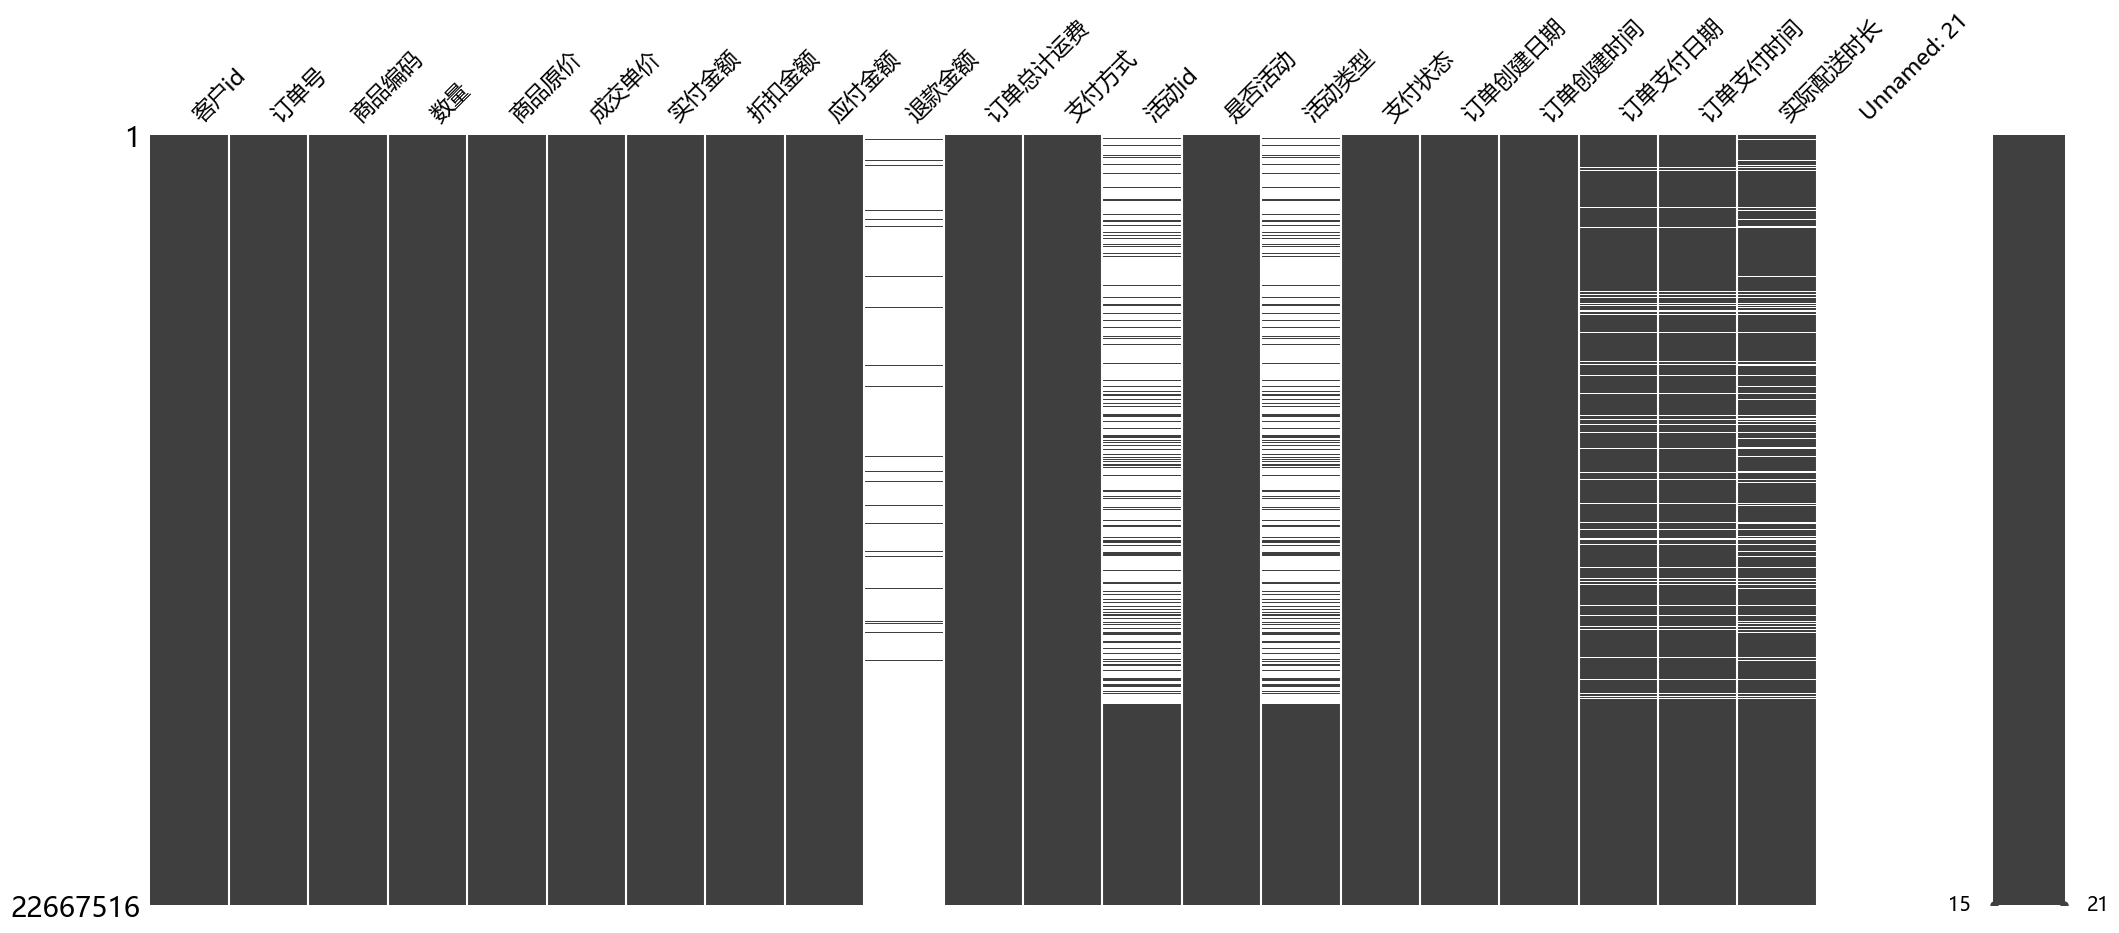

In [6]:
msno.matrix(order)

## 删除无用字段

其中删除时间数据是因为各个订单时间序列对应的时间并不一致且非常稀疏，不适合用时空图卷积, 'Unnamed: 21' 是空的，'退款金额'缺失了95%

In [174]:
order.drop(['订单创建日期', '订单创建时间', '订单支付日期', '订单支付时间', 'Unnamed: 21', '退款金额'], axis=1, inplace=True)

In [177]:
loss_rate(order)

活动类型      72.07598%
活动id      72.02708%
实际配送时长    13.59243%
客户id       0.00000%
订单号        0.00000%
商品编码       0.00000%
数量         0.00000%
商品原价       0.00000%
成交单价       0.00000%
实付金额       0.00000%
折扣金额       0.00000%
应付金额       0.00000%
订单总计运费     0.00000%
支付方式       0.00000%
是否活动       0.00000%
支付状态       0.00000%
dtype: object

In [178]:
order.head()

,客户id,订单号,商品编码,数量,商品原价,成交单价,实付金额,折扣金额,应付金额,订单总计运费,支付方式,活动id,是否活动,活动类型,支付状态,实际配送时长
0,6970903968834916810,BL2305080755068263791,7049983581464297472,1,19.0,19.0,19.0,0.0,19.0,0.0,支付宝,NaN,否,NaN,已支付,3.0
1,6970903968834916810,BL2305080755068263791,7042381643315150848,2,83.0,83.0,166.0,0.0,166.0,0.0,支付宝,NaN,否,NaN,已支付,3.0
2,6970903968834916810,BL2305080755068263791,7029328967035256832,2,21.5,21.5,43.0,0.0,43.0,0.0,支付宝,NaN,否,NaN,已支付,3.0
3,6970903968834916810,BL2305080755068263791,7028187294771314688,1,22.5,22.5,22.5,0.0,22.5,0.0,支付宝,NaN,否,NaN,已支付,3.0
4,6970903968834916810,BL2305080755068263791,7024974707002834944,2,27.5,27.5,55.0,0.0,55.0,0.0,支付宝,NaN,否,NaN,已支付,3.0


## 活动类型

删除‘活动id’和‘是否活动’，仅保留活动类型

In [179]:
order['活动类型'].fillna('无', inplace=True)

In [180]:
# 转独热

activaties_code = pd.get_dummies(order['活动类型'], prefix='活动类型')
# 将独热编码结果与原始 DataFrame 合并
order = pd.concat([order, activaties_code], axis=1)
# 删除原始的客户类型字段
order.drop(columns=['活动类型'], inplace=True)

In [181]:
order.drop(columns=['活动id', '是否活动'], inplace=True)

In [182]:
order.head()

,客户id,订单号,商品编码,数量,商品原价,成交单价,实付金额,折扣金额,应付金额,订单总计运费,支付方式,支付状态,实际配送时长,活动类型_换购,活动类型_无,活动类型_满减,活动类型_满赠,活动类型_满返,活动类型_特价,活动类型_秒杀
0,6970903968834916810,BL2305080755068263791,7049983581464297472,1,19.0,19.0,19.0,0.0,19.0,0.0,支付宝,已支付,3.0,False,True,False,False,False,False,False
1,6970903968834916810,BL2305080755068263791,7042381643315150848,2,83.0,83.0,166.0,0.0,166.0,0.0,支付宝,已支付,3.0,False,True,False,False,False,False,False
2,6970903968834916810,BL2305080755068263791,7029328967035256832,2,21.5,21.5,43.0,0.0,43.0,0.0,支付宝,已支付,3.0,False,True,False,False,False,False,False
3,6970903968834916810,BL2305080755068263791,7028187294771314688,1,22.5,22.5,22.5,0.0,22.5,0.0,支付宝,已支付,3.0,False,True,False,False,False,False,False
4,6970903968834916810,BL2305080755068263791,7024974707002834944,2,27.5,27.5,55.0,0.0,55.0,0.0,支付宝,已支付,3.0,False,True,False,False,False,False,False


## 金额相关

删除商品原价、成交单价、折扣金额、应付金额，仅保留实付金额

In [183]:
order.drop(columns=['商品原价', '成交单价', '折扣金额', '应付金额'], inplace=True)

## 支付状态

删除`支付方式`为`待付款`和`支付状态`为`待支付`、`已退款`的

In [184]:
order['支付方式'].value_counts()

支付方式
微信          14144710
支付宝          6176014
待付款          1637390
银行转账          706549
泸州银行_乐业贷        2853
Name: count, dtype: int64

In [185]:
order['支付状态'].value_counts()

支付状态
已支付     19089032
待支付      1991575
已退款       932078
部分退款      654831
Name: count, dtype: int64

In [186]:
order = order[order['支付方式'] != '待付款']
order = order[order['支付状态'] != '待支付']
order = order[order['支付状态'] != '已退款']

In [187]:
order.drop('支付状态', axis=1, inplace=True)

In [188]:
order['支付方式']

0           支付宝
1           支付宝
2           支付宝
3           支付宝
4           支付宝
           ... 
22667502     微信
22667503     微信
22667510     微信
22667511     微信
22667512     微信
Name: 支付方式, Length: 19743863, dtype: object

In [189]:
activaties_code = pd.get_dummies(order['支付方式'], prefix='支付方式')
# 将独热编码结果与原始 DataFrame 合并
order = pd.concat([order, activaties_code], axis=1)
# 删除原始的客户类型字段
order.drop('支付方式', axis=1, inplace=True)

In [190]:
order.head()

,客户id,订单号,商品编码,数量,实付金额,订单总计运费,实际配送时长,活动类型_换购,活动类型_无,活动类型_满减,活动类型_满赠,活动类型_满返,活动类型_特价,活动类型_秒杀,支付方式_微信,支付方式_支付宝,支付方式_泸州银行_乐业贷,支付方式_银行转账
0,6970903968834916810,BL2305080755068263791,7049983581464297472,1,19.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False
1,6970903968834916810,BL2305080755068263791,7042381643315150848,2,166.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False
2,6970903968834916810,BL2305080755068263791,7029328967035256832,2,43.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False
3,6970903968834916810,BL2305080755068263791,7028187294771314688,1,22.5,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False
4,6970903968834916810,BL2305080755068263791,7024974707002834944,2,55.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False


## 实际配送时长

众数填

In [191]:
order['实际配送时长'].fillna(order['实际配送时长'].mode().item(), inplace=True)

In [192]:
loss_rate(order)

客户id             0.00000%
订单号              0.00000%
支付方式_泸州银行_乐业贷    0.00000%
支付方式_支付宝         0.00000%
支付方式_微信          0.00000%
活动类型_秒杀          0.00000%
活动类型_特价          0.00000%
活动类型_满返          0.00000%
活动类型_满赠          0.00000%
活动类型_满减          0.00000%
活动类型_无           0.00000%
活动类型_换购          0.00000%
实际配送时长           0.00000%
订单总计运费           0.00000%
实付金额             0.00000%
数量               0.00000%
商品编码             0.00000%
支付方式_银行转账        0.00000%
dtype: object

In [193]:
order.shape  # 订单表还有1974万条

(19743863, 18)

In [194]:
order.to_csv('../data/orders_m1.csv', index=False, encoding='utf-8-sig')

# 客户表-订单表数据筛选

In [195]:
# 获取订单表中的客户id列表
order_customer_ids = order['客户id'].unique()

# 在客户表中保留存在于订单表中的客户id的样本
cus = cus[cus['客户id'].isin(order_customer_ids)]

In [196]:
cus.shape  # 最后还有16万条客户信息

(161086, 13)

In [197]:
cus.to_csv('../data/customers_m1.csv', index= False, encoding='utf-8-sig')

# 订单表-商品表数据筛选

In [198]:
com.head()

,商品编码,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,品牌名称_京鸿阁,品牌名称_其他,品牌名称_小葫芦宝,品牌名称_蜀汉本草,品牌名称_驰铭,医保类型_乙类,医保类型_医保,医保类型_甲类,医保类型_非医保
0,6970878583019671591,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False,False,False,False,True
1,6970878583019671976,2.30,3.69,12.0,1.39,8.31,0.692500,False,False,False,True,False,False,False,False,True
2,6970878583023866125,2.30,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False,False,False,False,True
3,6970878583019671697,0.01,12.80,58.0,12.79,45.20,0.779310,False,True,False,False,False,False,False,False,True
4,6970878583019672109,22.00,21.90,98.0,-0.10,76.10,0.776531,False,True,False,False,False,False,False,False,True


In [199]:
# 获取订单表中的客户id列表
order_customer_ids = order['商品编码'].unique()

# 在客户表中保留存在于订单表中的客户id的样本
com = com[com['商品编码'].isin(order_customer_ids)]

In [200]:
com.shape  # 还剩2711个商品信息

(2711, 16)

In [201]:
com.to_csv('../data/commodity_m1.csv', index=False, encoding='utf-8-sig')

# 客户表-订单表-商品表 综合筛选样本

In [202]:
# 假设 cus、order 和 com 是三个 DataFrame，分别代表客户表、订单表和商品表

# 找到在三个表中都存在的客户ID和商品编码
common_customer_ids = set(cus['客户id']).intersection(set(order['客户id']))
common_product_codes = set(com['商品编码']).intersection(set(order['商品编码']))

# 在每个表中过滤出只存在于所有三个表中的样本
cus_common = cus[cus['客户id'].isin(common_customer_ids)]
order_common = order[order['客户id'].isin(common_customer_ids) & order['商品编码'].isin(common_product_codes)]
com_common = com[com['商品编码'].isin(common_product_codes)]

In [203]:
cus_common.to_csv('../data/customers_m1.csv', index=False, encoding='utf-8-sig')
order_common.to_csv('../data/orders_m1.csv', index=False, encoding='utf-8-sig')
com_common.to_csv('../data/commodity_m1.csv', index=False, encoding='utf-8-sig')

# 构建图数据

In [204]:
import torch
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T
import pandas as pd
from tqdm import tqdm
import torch_geometric.utils as pyg_utils
import matplotlib.pyplot as plt

In [205]:
cus = pd.read_csv('../data/customers_m1.csv')
com = pd.read_csv('../data/commodity_m1.csv')
order = pd.read_csv('../data/orders_m1.csv')

In [206]:
display(cus.iloc[:2])
display(com.iloc[:2])
display(order.iloc[:2])

,客户id,位置(新增),是否医保店,客户等级,客户店员数,是否有过投诉,连锁标记(更新2),注册时长,客户类型_医院,客户类型_单体药店,客户类型_卫生服务站,客户类型_诊所,客户类型_连锁药店
0,7081090359123820544,3,1,7,2.0,0,2,181,False,False,False,True,False
1,6970904116784796290,2,1,6,3.0,1,2,1032,False,False,True,False,False


,商品编码,工业采购价,客户采购价格,建议零售价,工业毛利额,客户毛利额,客户毛利率,品牌名称_京鸿阁,品牌名称_其他,品牌名称_小葫芦宝,品牌名称_蜀汉本草,品牌名称_驰铭,医保类型_乙类,医保类型_医保,医保类型_甲类,医保类型_非医保
0,6970878583019671591,2.3,3.69,12.8,1.39,9.11,0.711719,False,False,False,True,False,False,False,False,True
1,6970878583019671976,2.3,3.69,12.0,1.39,8.31,0.692500,False,False,False,True,False,False,False,False,True


,客户id,订单号,商品编码,数量,实付金额,订单总计运费,实际配送时长,活动类型_换购,活动类型_无,活动类型_满减,活动类型_满赠,活动类型_满返,活动类型_特价,活动类型_秒杀,支付方式_微信,支付方式_支付宝,支付方式_泸州银行_乐业贷,支付方式_银行转账
0,6970903968834916810,BL2305080755068263791,7049983581464297472,1,19.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False
1,6970903968834916810,BL2305080755068263791,7042381643315150848,2,166.0,0.0,3.0,False,True,False,False,False,False,False,False,True,False,False


In [207]:
# 构建特征
cus_features = torch.tensor(cus.drop(columns=['客户id']).astype(float).astype(float).values, dtype=torch.float)
com_features = torch.tensor(com.drop(columns=['商品编码']).astype(float).astype(float).values, dtype=torch.float)
edge_features = torch.tensor(order.drop(columns=['订单号', '客户id', '商品编码']).astype(float).values, dtype=torch.float)

# 构建客户节点映射字典
cus_map = {id: i for i, id in enumerate(cus['客户id'].unique())}

# 构建商品节点映射字典 
com_map = {id: i for i, id in enumerate(com['商品编码'].unique())}

# 重新编码订单边索引
order_src, order_dst = [], []
for cus_id, prod_id in zip(order['客户id'], order['商品编码']):
    if cus_id in cus_map and prod_id in com_map:
        order_src.append(cus_map[cus_id])
        order_dst.append(com_map[prod_id])

order_src = torch.tensor(order_src)
order_dst = torch.tensor(order_dst)

data = HeteroData()

# 添加节点
data['customer'].x = cus_features
data['customer'].num_nodes = len(cus_map)
data['product'].x = com_features 
data['product'].num_nodes = len(com_map)

# 添加边
data['customer', 'order', 'product'].edge_index = torch.stack([order_src, order_dst])
data['customer', 'order', 'product'].edge_attr = edge_features

data = T.ToUndirected()(data)  # 转无向图，原本边方向是客户到产品，现在改成双向，否则商品信息无法到客户

In [208]:
torch.save(data, '../data/hetero_graph_data.pt')

In [2]:
data = torch.load('../data/hetero_graph_data.pt')

In [210]:
data

HeteroData(
  customer={
    x=[161086, 12],
    num_nodes=161086,
  },
  product={
    x=[2711, 15],
    num_nodes=2711,
  },
  (customer, order, product)={
    edge_index=[2, 18160895],
    edge_attr=[18160895, 15],
  },
  (product, rev_order, customer)={
    edge_index=[2, 18160895],
    edge_attr=[18160895, 15],
  }
)

**还有 161086个客户样本，2711个商品样本，18160895条双向边连接**

In [4]:
data.validate()

True

In [5]:
data.is_undirected()  # 是否无向图

True